# Importing libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Getting The data

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# Constructing the Model

In [25]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)      

# Fitting the model

In [27]:
fit = cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
250/250 [==============================] - 59s 236ms/step - loss: 0.6885 - accuracy: 0.5439 - val_loss: 0.6731 - val_accuracy: 0.5805
Epoch 2/15
250/250 [==============================] - 62s 246ms/step - loss: 0.6721 - accuracy: 0.5865 - val_loss: 0.6514 - val_accuracy: 0.6130
Epoch 3/15
250/250 [==============================] - 65s 260ms/step - loss: 0.6372 - accuracy: 0.6378 - val_loss: 0.6024 - val_accuracy: 0.6920
Epoch 4/15
250/250 [==============================] - 68s 271ms/step - loss: 0.5894 - accuracy: 0.6831 - val_loss: 0.5736 - val_accuracy: 0.7095
Epoch 5/15
250/250 [==============================] - 69s 275ms/step - loss: 0.5609 - accuracy: 0.7076 - val_loss: 0.5298 - val_accuracy: 0.7410
Epoch 6/15
250/250 [==============================] - 70s 280ms/step - loss: 0.5287 - accuracy: 0.7368 - val_loss: 0.5480 - val_accuracy: 0.7420
Epoch 7/15
250/250 [==============================] - 76s 305ms/step - loss: 0.4922 - accuracy: 0.7590 - val_loss: 0.4976 - val_ac

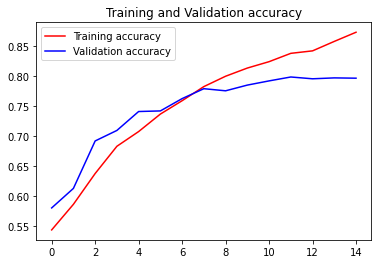

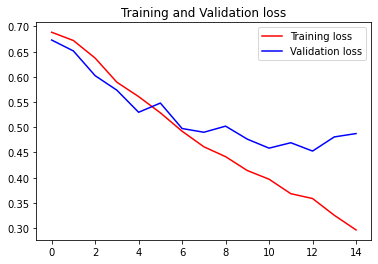

In [28]:
# Plotting loss vs accuracy

acc = fit.history["accuracy"]
val_acc = fit.history["val_accuracy"]
loss = fit.history["loss"]
val_loss = fit.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()

In [29]:
import joblib 
joblib.dump(cnn, 'saved_model.pkl') 

INFO:tensorflow:Assets written to: ram://314efa69-13d0-4c93-941a-718091699364/assets


['saved_model.pkl']

# MAKING A PREDICTION

The prediction is:  dog


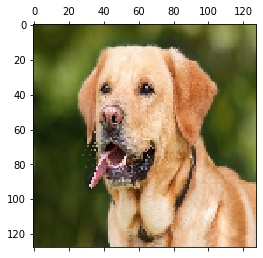

In [30]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (128, 128))
plt.matshow(test_image)
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print("The prediction is: ",prediction)

The prediction is:  cat


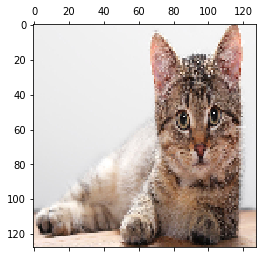

In [32]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (128, 128))
plt.matshow(test_image)
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print("The prediction is: ",prediction)